In [ ]:
# Human Activity Recognition with Additional Activities and Voice Feedback (Colab-Compatible)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from IPython.display import Audio, display
from gtts import gTTS
import os

In [ ]:
# Voice function compatible with Google Colab using gTTS
def speak(text):
    print("[Voice]:", text)
    tts = gTTS(text)
    tts.save("temp.mp3")
    display(Audio("temp.mp3", autoplay=True))

In [ ]:
# Seed for reproducibility
np.random.seed(42)

In [ ]:
# Simulated data generation
timesteps = np.linspace(0, 10, 1000)
n_samples = len(timesteps)

In [ ]:
# Simulate accelerometer-like signals for each activity
squat_signal   = np.sin(2 * np.pi * 0.5 * timesteps) + 0.1*np.random.randn(n_samples)
jump_signal    = np.sin(2 * np.pi * 2.0 * timesteps) + 0.1*np.random.randn(n_samples)
pushup_signal  = np.sin(2 * np.pi * 1.0 * timesteps) + 0.1*np.random.randn(n_samples)
walking_signal = np.abs(np.sin(2 * np.pi * 0.8 * timesteps)) + 0.05*np.random.randn(n_samples)
sitting_signal = 0.1 * np.random.randn(n_samples)
sleeping_signal = 0.05 * np.random.randn(n_samples)

signals = {
    "Squats": squat_signal,
    "Jumping Jacks": jump_signal,
    "Push-ups": pushup_signal,
    "Walking": walking_signal,
    "Sitting": sitting_signal,
    "Sleeping": sleeping_signal
}

# Combine signals and labels
X = np.concatenate([signal.reshape(-1, 1) for signal in signals.values()], axis=0)
y = np.concatenate([np.full(n_samples, i) for i in range(len(signals))], axis=0)
labels = list(signals.keys())


In [ ]:
# Standardize input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the labels
ohe = OneHotEncoder(sparse_output=False)
y = y.reshape(-1, 1)
y_encoded = ohe.fit_transform(y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(signals), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2495 - loss: 1.6650 - val_accuracy: 0.4458 - val_loss: 1.4231
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4112 - loss: 1.3866 - val_accuracy: 0.4521 - val_loss: 1.2777
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4135 - loss: 1.2952 - val_accuracy: 0.4646 - val_loss: 1.2532
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4477 - loss: 1.2463 - val_accuracy: 0.4458 - val_loss: 1.2368
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4354 - loss: 1.2580 - val_accuracy: 0.4437 - val_loss: 1.2299
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4316 - loss: 1.2472 - val_accuracy: 0.4458 - val_loss: 1.2285
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4332 - loss: 1.2580 - val_accuracy: 0.4583 - val_loss: 1.2262
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4346 - loss: 1.2543 - val_accuracy: 0.

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4116 - loss: 1.2800
[Voice]: Model achieved 40.58 percent accuracy on test data


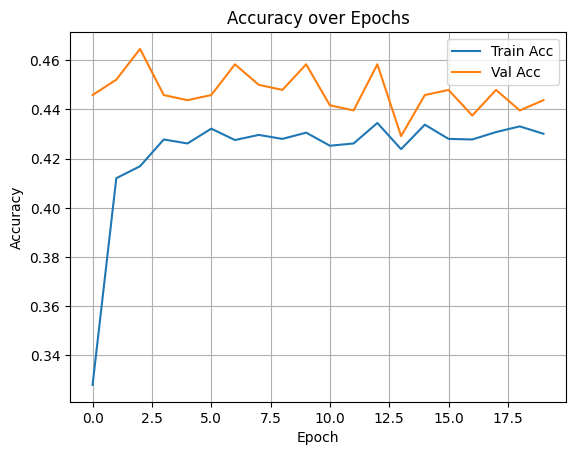

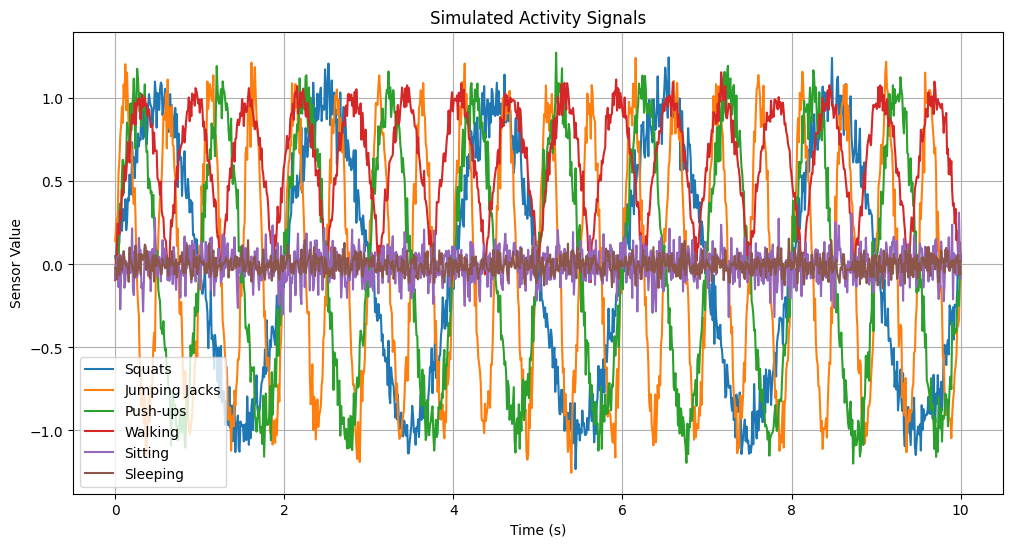

In [ ]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
speak(f"Model achieved {acc*100:.2f} percent accuracy on test data")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot example signals
plt.figure(figsize=(12, 6))
for label, signal in signals.items():
    plt.plot(timesteps, signal, label=label)
plt.legend()
plt.title("Simulated Activity Signals")
plt.xlabel("Time (s)")
plt.ylabel("Sensor Value")
plt.grid(True)
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:

               precision    recall  f1-score   support

       Squats       0.00      0.00      0.00       215
Jumping Jacks       0.00      0.00      0.00       222
     Push-ups       0.29      0.43      0.35       176
      Walking       0.39      0.89      0.54       204
      Sitting       0.42      0.59      0.49       189
     Sleeping       0.56      0.61      0.59       194

     accuracy                           0.41      1200
    macro avg       0.28      0.42      0.33      1200
 weighted avg       0.27      0.41      0.32      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


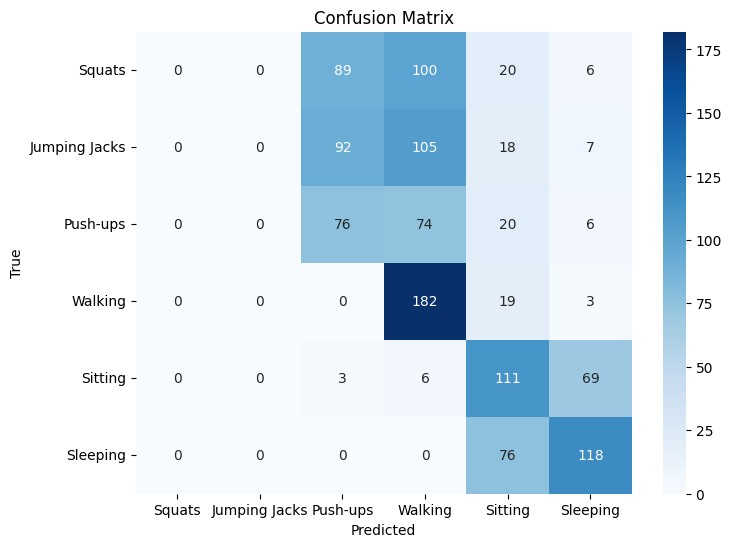

In [ ]:
# Predictions and confusion matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Activity Duration Summary and Frequency
activity_duration_sec = 10  # each signal spans 10 seconds
sample_rate = n_samples / activity_duration_sec
print("\n--- Activity Duration and Frequency Summary ---\n")
for i, label in enumerate(labels):
    signal = list(signals.values())[i]
    # Repetition estimation using zero-crossings
    zero_crossings = ((signal[:-1] * signal[1:]) < 0).sum() // 2
    freq = zero_crossings / activity_duration_sec
    duration = activity_duration_sec
    print(f"{label}: {zero_crossings} repetitions, Frequency: {freq:.2f} Hz, Duration: {duration:.2f} sec")
    speak(f"Activity {label} lasted {duration:.2f} seconds with a frequency of {freq:.2f} repetitions per second")



--- Activity Duration and Frequency Summary ---

Squats: 16 repetitions, Frequency: 1.60 Hz, Duration: 10.00 sec
[Voice]: Activity Squats lasted 10.00 seconds with a frequency of 1.60 repetitions per second


Jumping Jacks: 26 repetitions, Frequency: 2.60 Hz, Duration: 10.00 sec
[Voice]: Activity Jumping Jacks lasted 10.00 seconds with a frequency of 2.60 repetitions per second


Push-ups: 22 repetitions, Frequency: 2.20 Hz, Duration: 10.00 sec
[Voice]: Activity Push-ups lasted 10.00 seconds with a frequency of 2.20 repetitions per second


Walking: 11 repetitions, Frequency: 1.10 Hz, Duration: 10.00 sec
[Voice]: Activity Walking lasted 10.00 seconds with a frequency of 1.10 repetitions per second


Sitting: 264 repetitions, Frequency: 26.40 Hz, Duration: 10.00 sec
[Voice]: Activity Sitting lasted 10.00 seconds with a frequency of 26.40 repetitions per second


Sleeping: 252 repetitions, Frequency: 25.20 Hz, Duration: 10.00 sec
[Voice]: Activity Sleeping lasted 10.00 seconds with a frequency of 25.20 repetitions per second



--- Mixed Signal Stream Prediction ---
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


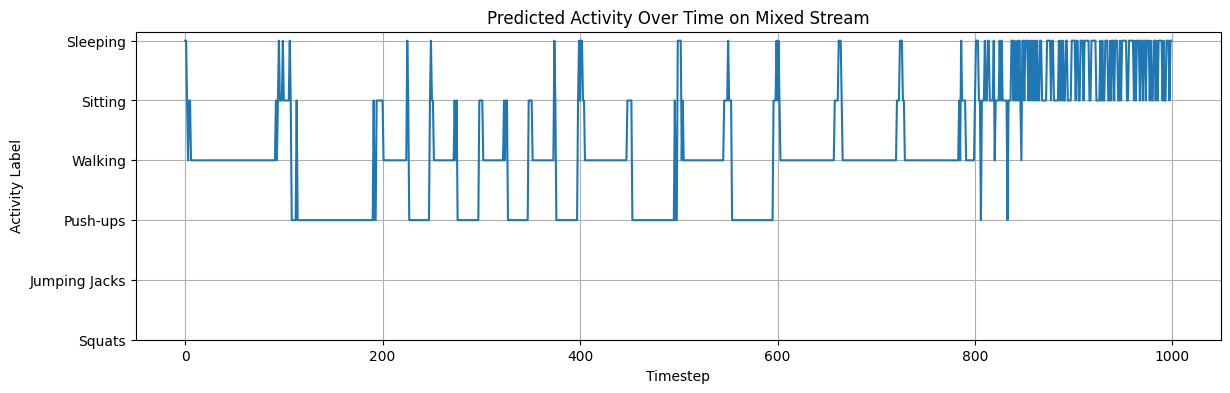

In [ ]:
# Predict activity on a mixed signal stream
print("\n--- Mixed Signal Stream Prediction ---")
mixed_stream = np.concatenate([
    signals["Squats"][:200],
    signals["Jumping Jacks"][:200],
    signals["Push-ups"][:200],
    signals["Walking"][:200],
    signals["Sitting"][:100],
    signals["Sleeping"][:100]
])

mixed_scaled = scaler.transform(mixed_stream.reshape(-1, 1))
mixed_pred = model.predict(mixed_scaled)
mixed_labels = np.argmax(mixed_pred, axis=1)

plt.figure(figsize=(14, 4))
plt.plot(mixed_labels, label="Predicted Label")
plt.title("Predicted Activity Over Time on Mixed Stream")
plt.xlabel("Timestep")
plt.ylabel("Activity Label")
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.grid(True)
plt.show()


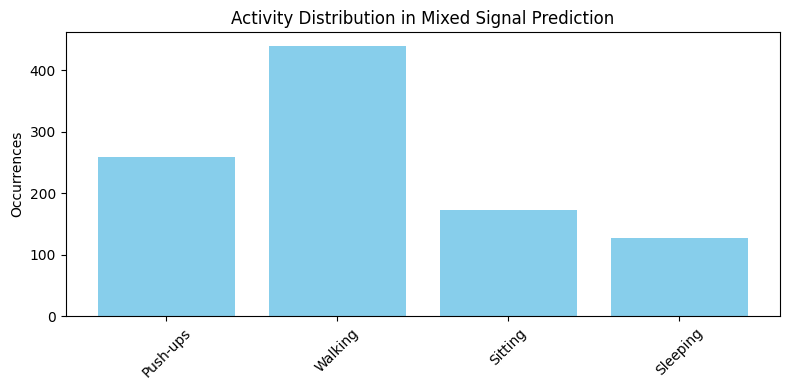

In [ ]:
# Plot class distribution of predictions
plt.figure(figsize=(8, 4))
unique, counts = np.unique(mixed_labels, return_counts=True)
plt.bar([labels[i] for i in unique], counts, color='skyblue')
plt.title("Activity Distribution in Mixed Signal Prediction")
plt.ylabel("Occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 🔁 Real-time-like Prediction Interface
def real_time_colab_prediction():
    print("\n--- Real-Time Activity Prediction (Simulated) ---")
    print("Type 'exit' to stop\n")
    while True:
        user_input = input("Enter simulated sensor value (e.g., 0.5): ")
        if user_input.lower() == 'exit':
            print("✅ Prediction ended.")
            break
        try:
            val = float(user_input)
            val_scaled = scaler.transform([[val]])
            pred = model.predict(val_scaled)
            predicted_label = labels[np.argmax(pred)]
            print(f"🧠 Predicted Activity: {predicted_label}")
            speak(f"The predicted activity is {predicted_label}")
        except ValueError:
            print("⚠️ Please enter a valid numeric value.")

# Run this function to start
real_time_colab_prediction()



--- Real-Time Activity Prediction (Simulated) ---
Type 'exit' to stop

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
🧠 Predicted Activity: Push-ups
[Voice]: The predicted activity is Push-ups


In [ ]:
# Get user weight input in Colab
try:
    user_weight_kg = float(input("Enter your weight in kilograms (e.g., 70): "))
except:
    print("Invalid input. Using default weight of 70 kg.")
    user_weight_kg = 70
calories_data = []

for row in summary_data:
    activity, reps, freq, duration = row
    MET = MET_values.get(activity, 1.0)
    calories = (MET * 3.5 * user_weight_kg / 200) * (duration / 60)  # formula based on duration in minutes
    calories_data.append(calories)
    print(f"Estimated calories burned for {activity}: {calories:.2f} kcal")
    speak(f"You burned approximately {calories:.2f} calories doing {activity}")


Enter your weight in kilograms (e.g., 70): 50
Estimated calories burned for Squats: 0.73 kcal
[Voice]: You burned approximately 0.73 calories doing Squats


Estimated calories burned for Jumping Jacks: 1.17 kcal
[Voice]: You burned approximately 1.17 calories doing Jumping Jacks


Estimated calories burned for Push-ups: 1.02 kcal
[Voice]: You burned approximately 1.02 calories doing Push-ups


Estimated calories burned for Walking: 0.51 kcal
[Voice]: You burned approximately 0.51 calories doing Walking


Estimated calories burned for Sitting: 0.19 kcal
[Voice]: You burned approximately 0.19 calories doing Sitting


Estimated calories burned for Sleeping: 0.13 kcal
[Voice]: You burned approximately 0.13 calories doing Sleeping


In [ ]:
model.save('har_activity_model.keras')


In [ ]:
# Save summary to CSV
summary_df = pd.DataFrame(summary_data, columns=["Activity", "Repetitions", "Frequency", "Duration"])
summary_df.to_csv("activity_summary.csv", index=False)


In [ ]:
from google.colab import files
files.download("activity_summary.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>